
# Study of traffic and naturalistic trajectories of vehicles on highway

![highD](images/aerial_view.JPG "Naturalistic Trajectories on Highway")

Naturalistic trajectories of road users has gained importance with the onset of increasing
level of research being done on automated vehicles with various levels of autonomy.
For different levels of automated driving features, such a dataset is important for
for safety validation based on scenario-based testing. 

Different public datasets such as KITTI [1] and Cityscapes [2] are available to foster research
on automated driving. But these datasets contain single annotated images from vehicle 
onboard cameras, these datasets are mainly utilized for development of computer vision algorithms.
such as object detection and scene understanding.

## The highD Dataset

The highD dataset (https://www.highd-dataset.com/) is a naturalistic vehicle trajectory dataset from German Highways.
The authors make use of novel methods to measure data from an aerial perspective with the goal 
of collecting data with reasonable effort and to include all data relevant for a description of the 
identified scenarios in sufficient quality. Prior to this work, no public trajectory
dataset of vehicle trajectories on highways created with drone video data existed [3].

Though the highD dataset was originally intended for safety validation, the data 
captured is fit to be used for other purposes. As such, the scope of this project 
is the study of this dataset to show that it can be used to:

* Extract relevant data for traffic analysis
* Get naturalistic trajectories for study and develop functions in virtual vehicle environments

Especially the use of such a rich dataset for traffic analysis can aid decision-makers significantly.

| Capture Method | Locations |
| :-: | :-: |
| ![highD](images/drone_capture2.jpg) | ![highD](images/location2.jpg)  |

## Characteristics and methods of recording of the dataset

To admit ourselves the good quality of the highD dataset such that no further post-processing
is needed, we consider its characteristics and the methods used for its recording [3]:
* Characteristics:
 * The full dataset includes post-processed trajectories of 110,000 vehicles on German highways
around Cologne in the NRW-region of Germany
 * 60 recordings were made with an average length of 17 minutes (16.5 hours in total)
covering a road-segment of about 420 meters
* Method of recording:
 * Videos were recorded in 4K (4096x2160) resolution at 25 fps using DJI Phantom 4 Pro Plus
 * The recordings only took place on sunny and windless days from 8 AM to 5 PM to maximize the
quality of recordings and minimize the need for stabilization of the drone
* Data treatment 
 * Videos were further stabilized using OpenCV by estimating transformations that map the 
background in each frame to the background in the first frame
 * U-Net (a common neural network architecture for semantic segmentation which for every pixel 
of each frame, if it belongs to a vehicle or to the background) was used to create bounding boxes
by detecting pixel clusters belonging to vehicles. Static objects such as lane markings, 
traffic signs and speed limits were annotated manually
 * The initial training set of the semantic segmentation neural network used for the detection
consists of about 3000 image patches. The patches include vehicles extracted from ten recordings 
of different locations with varying light conditions. Augmentation including flipping, adding 
Gaussian noise and changing the contrast increased the size of the dataset to 12,000 vehicles
 * Testing on a validation set of images, the trained model detected about 99% of the vehicles 
while keeping the false positive detection at 2%. The resulting mean positional errors of the 
vehicle midpoint in longitudinal and lateral directions are below 3 cm each in comparison to the 
manually created labels.



## Exploring the dataset
The complete dataset is sub-divided into 60 parts for 60 recordings,
each taken between 8am to 5 pm on weekdays lasting about 17 minutes.
For each recording. the dataset consists of 4 files:
* An aerial shot of the specific highway area
* A CSV file containing information about the site: [1-60]_recordingMeta.csv
* A CSV file including the vehicle dimensions, vehicle class, driving direction 
and the mean speed: [1-60]_tracksMeta.csv
* Detailed information like speeds, accelerations, lane positions and a 
description of surrounding vehicles in every frame: [1-60]_tracks.csv


In [1]:
# importing various required libraries
import numpy as np # math library
import pandas as pd # Library to handle databases
import matplotlib.pyplot as plt # Graphic library
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns# Graphic library specialized in stats
import warnings #to suppress SeaBorn warning for mandatory data variable in newer versions
warnings.filterwarnings("ignore")
import glob
import os #for handling files
import re #for methods of regular expression

print("Setup Complete...")

Setup Complete...


In [2]:
# check whether the working directory contains the dataset  
path = os.getcwd() + "\data"
try:
    os.path.isdir(path) == True
    print("Dataset correctly loaded...")
except Exception:
    print("The current directory must contain the dataset in a folder named Data")

Dataset correctly loaded...


In [3]:
"""Load the csv files for the first recording"""
# specify path of csv files of the first recording 
filepath_tracks01 = "data/01_tracks.csv"
filepath_tracksMeta01 = "data/01_tracksMeta.csv"
filepath_recordingMeta01 = "data/01_recordingMeta.csv"

# read the csv files of the first recording
tracksMeta01 = pd.read_csv(filepath_tracksMeta01, index_col='id')
tracks01 = pd.read_csv(filepath_tracks01)
recordingMeta01 = pd.read_csv(filepath_recordingMeta01, index_col='id')

In [4]:
recordingMeta01.head() #display part of the dataframe for recordingsMeta file of the first recording

,width,height,initialFrame,finalFrame,numFrames,class,drivingDirection,traveledDistance,minXVelocity,maxXVelocity,meanXVelocity,minDHW,minTHW,minTTC,numLaneChanges
id,,,,,,,,,,,,,,,
1,4.85,2.12,1,33,33,Car,2,52.25,40.85,41.30,41.07,-1.00,-1.00,-1.00,0
2,4.24,1.92,1,130,130,Car,1,167.44,32.04,32.90,32.48,112.62,3.51,-1.00,0
3,3.94,1.92,1,157,157,Car,2,225.23,35.69,36.50,36.13,90.31,2.53,-1.00,0
4,5.05,2.22,1,161,161,Car,1,273.49,42.57,42.83,42.76,-1.00,-1.00,-1.00,0
5,4.24,1.82,1,182,182,Car,1,313.92,42.50,44.26,43.40,33.64,0.76,24.53,0


In [ ]:
tracksMeta01.head() #display part of the dataframe for tracksMeta file of the first recording

In [5]:
tracks01.head() #display part of the dataframe for tracks file of the first recording

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,1,1,362.26,21.68,4.85,2.12,40.85,0.00,0.30,0.0,...,0.0,0,3,0,0,0,0,0,6,5
1,2,1,363.73,21.68,4.85,2.12,40.87,0.00,0.30,0.0,...,0.0,0,14,0,0,0,0,0,6,5
2,3,1,365.27,21.68,4.85,2.12,40.88,0.00,0.31,0.0,...,0.0,0,14,0,0,0,0,0,6,5
3,4,1,366.83,21.68,4.85,2.12,40.89,0.00,0.32,0.0,...,0.0,0,14,0,0,0,0,0,6,5
4,5,1,368.42,21.68,4.85,2.12,40.90,0.01,0.32,0.0,...,0.0,0,14,0,0,0,0,0,6,5


In essence, we see that the 'recordingMeta' part includes the location of the
site, driving lanes on each lane.
A summary of every track including the vehicle dimensions,
vehicle class, driving direction and the mean speed is given by
the 'tracksMeta' part. Detailed information like speeds,
accelerations, lane positions and a description of surrounding
vehicles in every frame are stored for each track in the 'tracks' part.

## Traffic Analysis

It is of interest in studies of traffic on highways to look at characteristics like:
* Total number of vehicles as an estimate of traffic density
* Class of vehicles
* Mean velocities
* Time-headway (THW) and Time-to-collision (TTC) of the vehicles

Since the data was collected over the weekdays, assuming that the traffic pattern
is similar from one day to another which is a fair assumptions for highways, 
it is interesting to observe traffic density
in **different locations**, at **different times of the day**.
We differentiate between the different locations by the **Location ID** from 1 to 6, and we split the day as 
**[07:00, 10:00), [10:00, 14:00), [14:00, 18:00)** denoting morning, afternoon and evening respectively.


We start by plotting the total number of vehicles at each location at different times of the day.

In [7]:
"""
%[1-60]_recordingMeta.csv.$ contains the location ID, startTime and the total number of vehicles for each of the recording 
whereas each [1-60]_tracksMeta.csv.$ contains the mean vehicle speed and class of each vehicle detected for the
particular recording but without location ID and startTime fields

1. Merging: since multiple recordings represent the data for any one location and time of day, we merge the the data in 
%[1-60]_recordingMeta.csv.$ and %[1-60]_tracksMeta.csv.$ whilst adding a new field representing the location ID and startTime

2. Grouping: create intervals of time representing morning, afternoon and evening and 
group the data by the location ID and the intervals

3. Plotting: plot the total number of vehicles, frequency of class of vehicles and mean speeds 
at a particular location at a particular time of the day
"""
#MERGING
#an empty list to be appended with the individual dataframes representing each recording
recordingMeta_list = []
tracksMeta_list = []

#get the count of number of recordingMeta.csv files
recordingMeta_files = range(1,len(glob.glob("data/" + "*_recordingMeta.csv", recursive=False))+1)
#get the count of number of tracksMeta.csv files
tracksMeta_files = range(1,len(glob.glob("data/" + "*_tracksMeta.csv", recursive=False))+1)

for i in recordingMeta_files:
    if i<10:
        filepath_recordingMeta = "data/"+"0"+str(i)+"_recordingMeta.csv"
        filepath_tracksMeta = "data/"+"0"+str(i)+"_tracksMeta.csv"
    else:
        filepath_recordingMeta = "data/"+str(i)+"_recordingMeta.csv"
        filepath_tracksMeta = "data/"+str(i)+"_tracksMeta.csv"
    
    #read a single recordingMeta.csv as a dataframe
    recordingMeta_temp = pd.read_csv(filepath_recordingMeta, index_col='id')
    tracksMeta_temp = pd.read_csv(filepath_tracksMeta)
    
    #store the locationID from the recordingMeta.csv for the particular recording
    temp_locationId = (int(recordingMeta_temp['locationId'].values))
    #create a new field with the location ID in tracksMeta dataframe for the particular recording
    tracksMeta_temp['locationId'] = pd.Series(temp_locationId, index=tracksMeta_temp.index)
    
    #store the startTime from the recordingMeta.csv for the particular recording
    temp_startTime = list(recordingMeta_temp['startTime'].values)*len(tracksMeta_temp.index)
    #create a new field with the startTime in tracksMeta dataframe for the particular recording
    tracksMeta_temp['startTime'] = pd.Series(temp_startTime, index=tracksMeta_temp.index)
    
    #append the dataframe into a list
    recordingMeta_list.append(recordingMeta_temp)
    tracksMeta_list.append(tracksMeta_temp)

#merge the dataframes
recordingMeta = pd.concat(recordingMeta_list, axis=0)
tracksMeta = pd.concat(tracksMeta_list, axis=0)

In [8]:
#GROUPING: for number of vehicles
#create a new column with startTime in HHMM format that can be dealt as an integer rather than HH:MM
recordingMeta['startTime_hrs'] = recordingMeta['startTime'].apply(lambda x: re.sub(":[0-9].$", '', x)).astype('float')

#group-by location ID and the startTime which is divided into 3 equal intervals and aggregate by number of vehicles
number_vehicles = recordingMeta.groupby( [ recordingMeta["locationId"], pd.cut(recordingMeta["startTime_hrs"], 3) ])['numVehicles'].sum()

#replace Nan values (because recordings are not taken for all locations for all times of the day) by zeros
number_vehicles = number_vehicles.fillna(0)

#remove the multi-indices
number_vehicles = number_vehicles.unstack(level='locationId')
number_vehicles.columns = number_vehicles.columns.map(str)

#create a new column with the mid-value of the intervals representing the time of the day to be used in a scatter-plot
number_vehicles['timeOfDay'] = number_vehicles.index.values
number_vehicles['timeOfDay'] = number_vehicles['timeOfDay'].apply(lambda x: x.mid)

#observe the resulting dataframe
number_vehicles.head(6)

locationId,1,2,3,4,5,6,timeOfDay
startTime_hrs,,,,,,,
"(7.99, 11.333]",58554.0,3074.0,2379.0,4751.0,7468.0,2903.0,9.6615
"(11.333, 14.667]",17111.0,0.0,1368.0,0.0,2611.0,0.0,13.0000
"(14.667, 18.0]",10297.0,0.0,0.0,0.0,0.0,0.0,16.3335


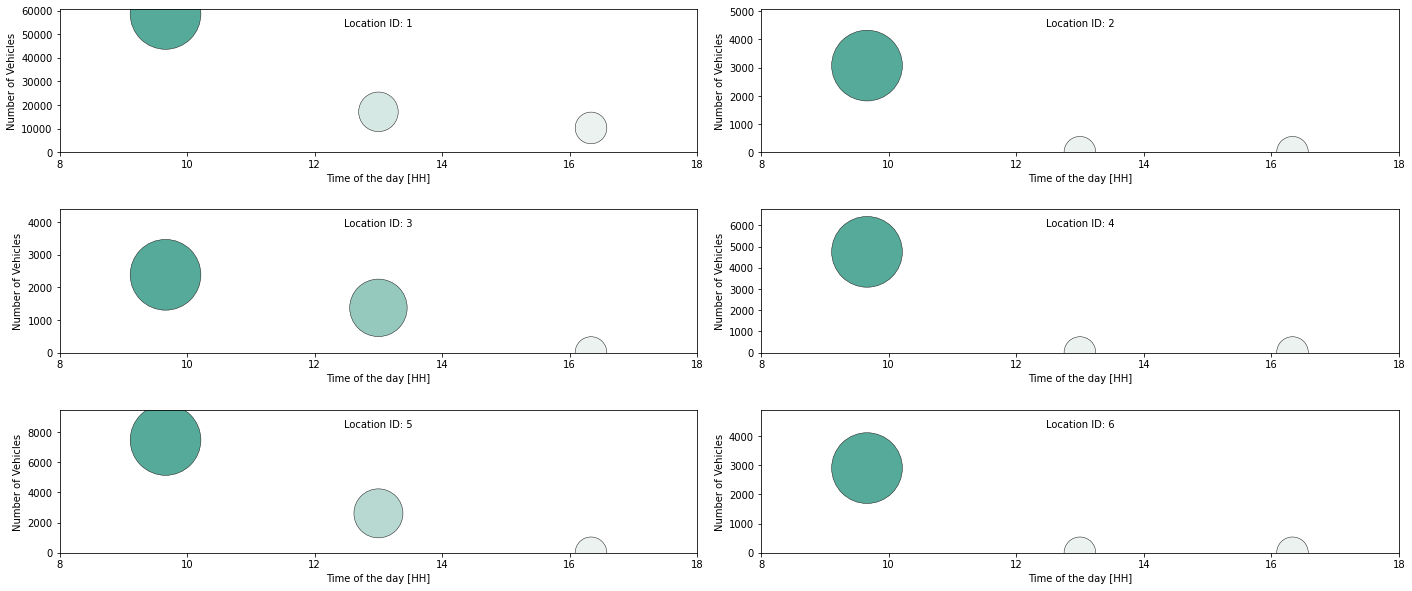

In [9]:
#PLOTTING: number of vehicles
columns = 2
rows = 3

fig = plt.figure(figsize=(24, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(1,7):
    axes = fig.add_subplot(rows, columns, i)
    plt.xlim(8, 18)
    plt.ylim(0, number_vehicles[str(i)].max()+2000)
    sns.scatterplot(number_vehicles['timeOfDay'], number_vehicles[str(i)],
                    hue=number_vehicles[str(i)], size=number_vehicles[str(i)],
                    sizes=(1000, 5000), legend=False, palette="light:#5A9", linewidth=.5, edgecolor=".1")
    axes.set(xlabel='Time of the day [HH]', ylabel='Number of Vehicles')
    axes.text(0.5, 0.9, 'Location ID: ' + str(i),
          fontsize=10, horizontalalignment='center',
              verticalalignment='center', transform=axes.transAxes) 

The exact nature of the highways is unknown but it can be noted that the highway at 
Location 1 can be expected to be dense with traffic. Also much more traffic is recorded in the morning
representative of the working commute
compared to other times of the day, afternoon in particular. Intuitively, one would expect the same 
about evenings too but data is not available for evenings past 6 pm (surely due to lighting conditions) 
and in locations other than the first location.

The class of the vehicles is plotted next.

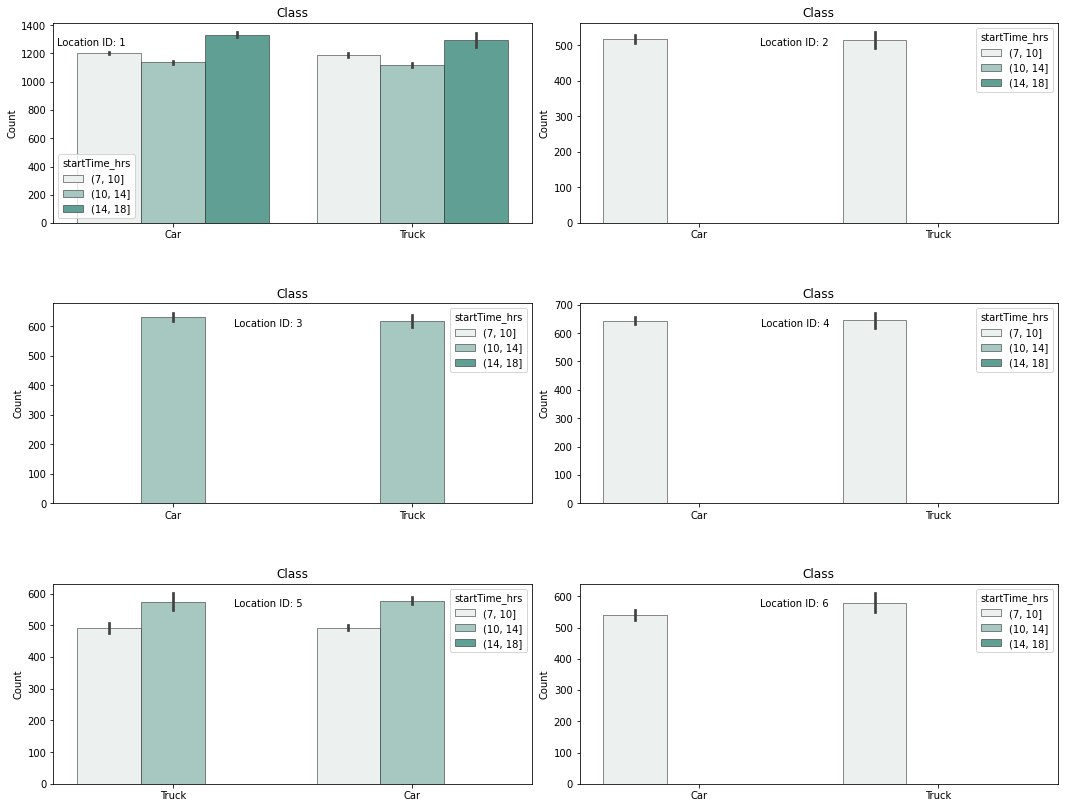

In [15]:
#PLOTTING: the class of the vehicles
fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
numCarsTrucks_list = []
for i in range(1,7):
    axes = fig.add_subplot(rows, columns, i)
    #GROUPING: for the class of the vehicles
    vehClass = tracksMeta[ tracksMeta.locationId == i ]
    
    numCarsTrucks_grouped = vehClass.groupby(vehClass['class'])['id'].count()
    numCarsTrucks_list.append(numCarsTrucks_grouped)
    
    vehClass['startTime_hrs'] = vehClass['startTime'].apply\
        (lambda x: re.sub(":[0-9].$", '', x)).astype('float')
    splitHours = pd.cut(vehClass["startTime_hrs"], bins=[7, 10, 14, 18]) 
    
    #PLOTTING: class of vehicles
    sns.barplot(x=vehClass['class'].values, y=vehClass['id'], hue=splitHours,  palette="light:#5A9", linewidth=.5, edgecolor=".1")
    if i > 1:
        axes.text(0.45, 0.9, 'Location ID: ' + str(i),
                  fontsize=10, horizontalalignment='center',
                      verticalalignment='center', transform=axes.transAxes)
    else:
        axes.text(0.08, 0.9, 'Location ID: ' + str(i),
                  fontsize=10, horizontalalignment='center',
                      verticalalignment='center', transform=axes.transAxes)    
    axes.set_title("Class")
    axes.set(ylabel='Count')

In [44]:
"""
A data-frame is created to represent the ratio of number of cars to trucks
"""
numCarsTrucks = pd.concat(numCarsTrucks_list, axis=0)
vehRatio = pd.DataFrame({'Location ID':  ['1', '2', '3', '4', '5', '6'],
        'Cars-Truck Ratio': [numCarsTrucks[0]/numCarsTrucks[1], numCarsTrucks[2]/numCarsTrucks[3], numCarsTrucks[4]/numCarsTrucks[5],
                              numCarsTrucks[6]/numCarsTrucks[7], numCarsTrucks[8]/numCarsTrucks[9], numCarsTrucks[10]/numCarsTrucks[11] ]
        })
vehRatio.set_index('Location ID', inplace=True)
vehRatio['Cars-Truck Ratio'] = round(vehRatio['Cars-Truck Ratio'], 2)
vehRatio.head(6)

,Cars-Truck Ratio
Location ID,
1,4.30
2,3.56
3,2.61
4,3.99
5,4.34
6,3.71


Hence the ratio between the number of cars and trucks seems to be about the same in all the
highways considered except for location 3. We now look at the mean velocities of the vehicles in 
a similar manner, i.e. at different locations at different times of the day.

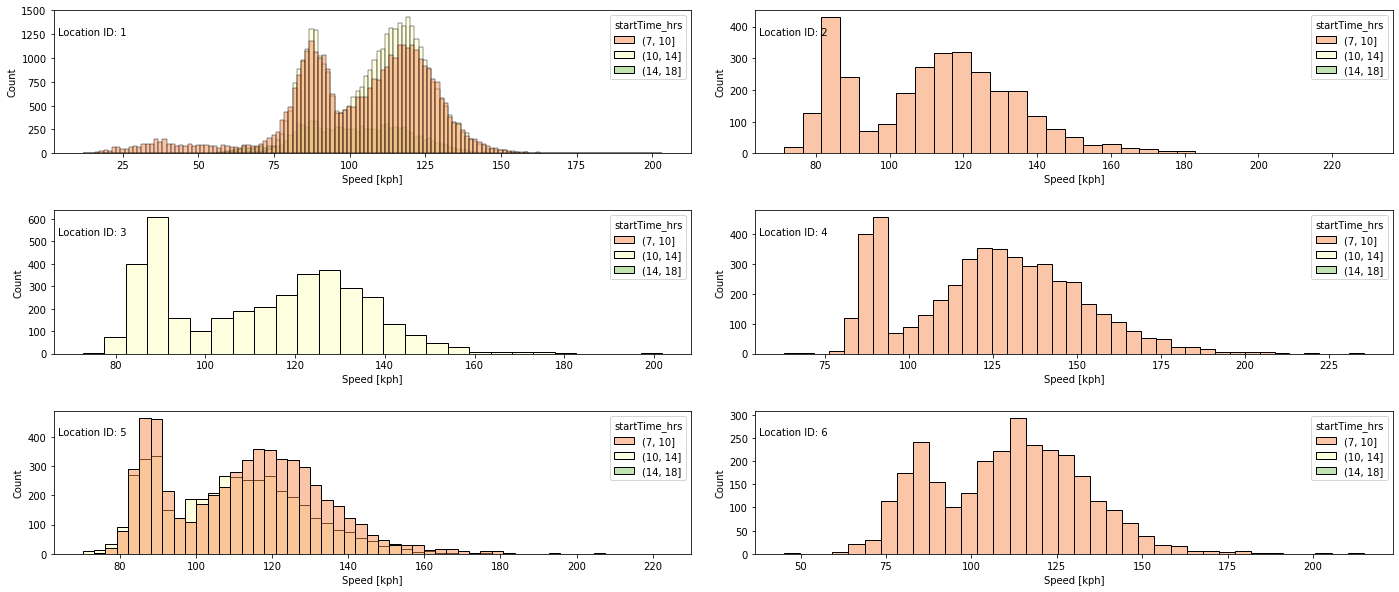

In [45]:
#PLOTTING the mean speeds of the vehicles
fig = plt.figure(figsize=(24, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(1,7):
    axes = fig.add_subplot(rows, columns, i)
    #GROUPING: for the mean speeds of the vehicles
    vehVelocity = tracksMeta[ tracksMeta.locationId == i ]
    vehVelocity['startTime_hrs'] = vehVelocity['startTime'].apply\
        (lambda x: re.sub(":[0-9].$", '', x)).astype('float')
    splitHours = pd.cut(vehVelocity["startTime_hrs"], bins=[7, 10, 14, 18]) 
    
    #PLOTTING: mean velocities of the vehicles
    sns.histplot(x=vehVelocity['meanXVelocity']*3.6, hue=splitHours, palette="RdYlGn")
    axes.text(0.06, 0.85, 'Location ID: ' + str(i),
              fontsize=10, horizontalalignment='center',
                  verticalalignment='center', transform=axes.transAxes)
    axes.set(xlabel='Speed [kph]', ylabel='Count')

The plots show the mean vehicle velocities to be distributed similarly in a bi-modal manner in all six different
locations with peaks at around 80 kph and 120 kph. Indeed the typical highway driving profile is not expected to vary
a lot from one location to another. But interestingly, Germany being the only country with no speed-limits
on highways, the distribution is spread out with vehicles recorded having a mean speed of upto 200 kph in
the last quantile in some of the locations.


We finally look at the important parameters Time-headway and Time-to-collision. 
Time-headway (THW) has been defined as the elapsed time between the front of the
lead vehicle passing a point on the roadway and the front of
the following vehicle passing the same point. In some countries, this indicator is used by
the authorities to impose fines for close following. 
THW gives an estimation of potential danger in car-following situations.

The TTC is the time that is left until a collision occurs if
both vehicles continue on the same course and at the same
speed. Therefore it is the time that is needed to cover the
distance between the lead and the following vehicle with
the relative speed between the lead and the following vehicle.
For TTC to make sense in use, the vehicles in question
have to be on collision course, but not necessarily in
a car-following situation. TTC in car-following situations
is only defined when the speed of the following vehicle is
higher than the speed of the lead vehicle. In research TTC
has often been used as a safety indicator for certain maneuvers
by determining the minimum TTC measured during
the maneuver [4].  


In Germany, the recommended minimum distance is “half the speedometer”, which means,
a car traveling at 80 km/h should keep a distance of at least
40 m. This rule translates to a recommended time headway
of 1.8 s. Fines are imposed when the time headway is smaller than 0.9 s [4].

Only vehicles with time headways of at most 6 s were considered in the analysis.

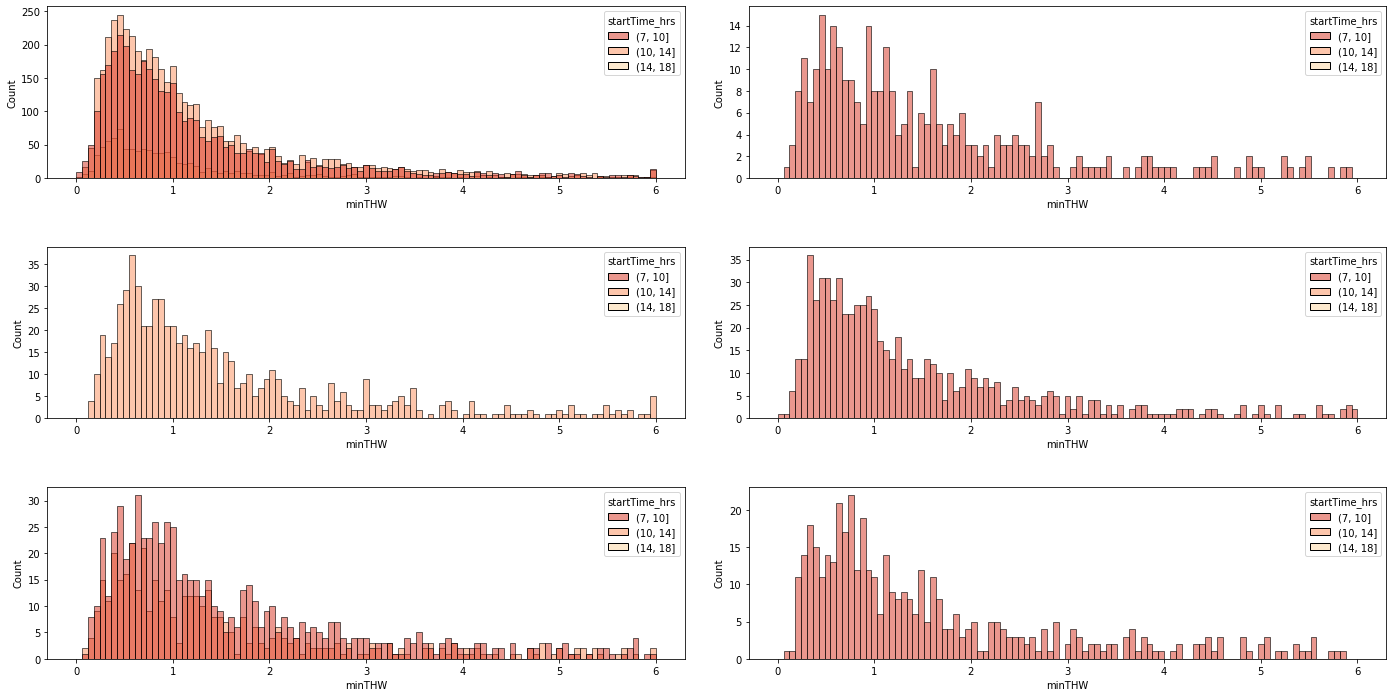

In [46]:
#PLOTTING: THW
fig = plt.figure(figsize=(24, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(1,7):
    axes = fig.add_subplot(rows, columns, i)
    #GROUPING
    vehTHW = tracksMeta[ tracksMeta.locationId == i ]
    vehTHW['startTime_hrs'] = vehTHW['startTime'].apply\
        (lambda x: re.sub(":[0-9].$", '', x)).astype('float')
    vehTHW.reset_index(inplace=True)
    splitHours = pd.cut(vehTHW["startTime_hrs"], bins=[7, 10, 14, 18]) 
    
    #filtering out vehicles that change lanes (not in ego-following situation) or have THW greater than 6 sec
    i = vehTHW[ (vehTHW.minTHW > 0) & (vehTHW.minTHW < 6) & (vehTHW.numLaneChanges == 0) ].index
    vehTHW = vehTHW.drop(i)
    
    sns.histplot(x=vehTHW['minTHW'], bins = np.linspace(0, 6, 100),
             palette="OrRd_r", hue=splitHours)

We define critical THW to be that which is less than 1.8 seconds only in the car-following situations, i.e.
no maneuvers such as lane changes took place in this consideration.
Looking at the ratio of such incidences:

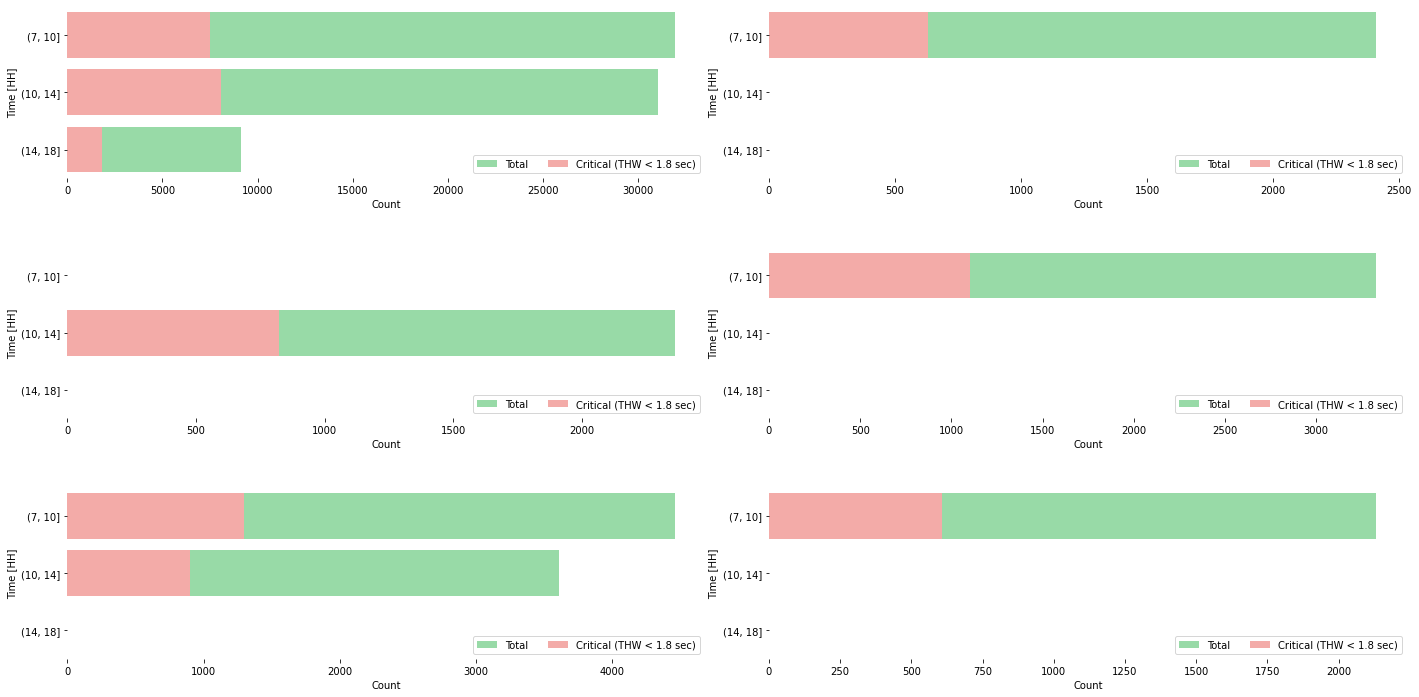

In [47]:
#PLOTTING: THW critical compared to total
fig = plt.figure(figsize=(24, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(1,7):
    axes = fig.add_subplot(rows, columns, i)
    #GROUPING
    vehTHW_crit = tracksMeta[ (tracksMeta.locationId == i) 
                              & (tracksMeta.minTHW < 6) & (tracksMeta.minTHW > 0) & (tracksMeta.numLaneChanges == 0)]
    vehTHW_crit['startTime_hrs'] = vehTHW_crit['startTime'].apply\
    (lambda x: re.sub(":[0-9].$", '', x)).astype('float')
    
    vehTHW_crit_tot = vehTHW_crit.groupby( pd.cut(vehTHW_crit["startTime_hrs"], bins=[7, 10, 14, 18]) )['minTHW'].count()
    
    vehTHW_crit_per = vehTHW_crit[ (vehTHW_crit.locationId == i) 
                                   & (vehTHW_crit.minTTC <= 1.8) & (vehTHW_crit.minTHW > 0) & (vehTHW_crit.numLaneChanges == 0) ]
    vehTHW_crit_per = vehTHW_crit_per.groupby( pd.cut(vehTHW_crit_per["startTime_hrs"], bins=[7, 10, 14, 18]) )['minTHW'].count()
    sns.set_color_codes("pastel")
    sns.barplot(y=vehTHW_crit_tot.index, x=vehTHW_crit_tot.values, label="Total", color="g")
    sns.barplot(y=vehTHW_crit_per.index, x=vehTHW_crit_per.values, label="Critical (THW < 1.8 sec)", color="r")
    # Add a legend and informative axis label
    axes.legend(ncol=2, loc="lower right", frameon=True)
    axes.set(ylabel="Time [HH]", xlabel="Count")
    sns.despine(left=True, bottom=True)

Hence, multiple vehicles violate the recommended safe Time-Headway of 1.8 seconds potentially increasing
the risk of accidents.  

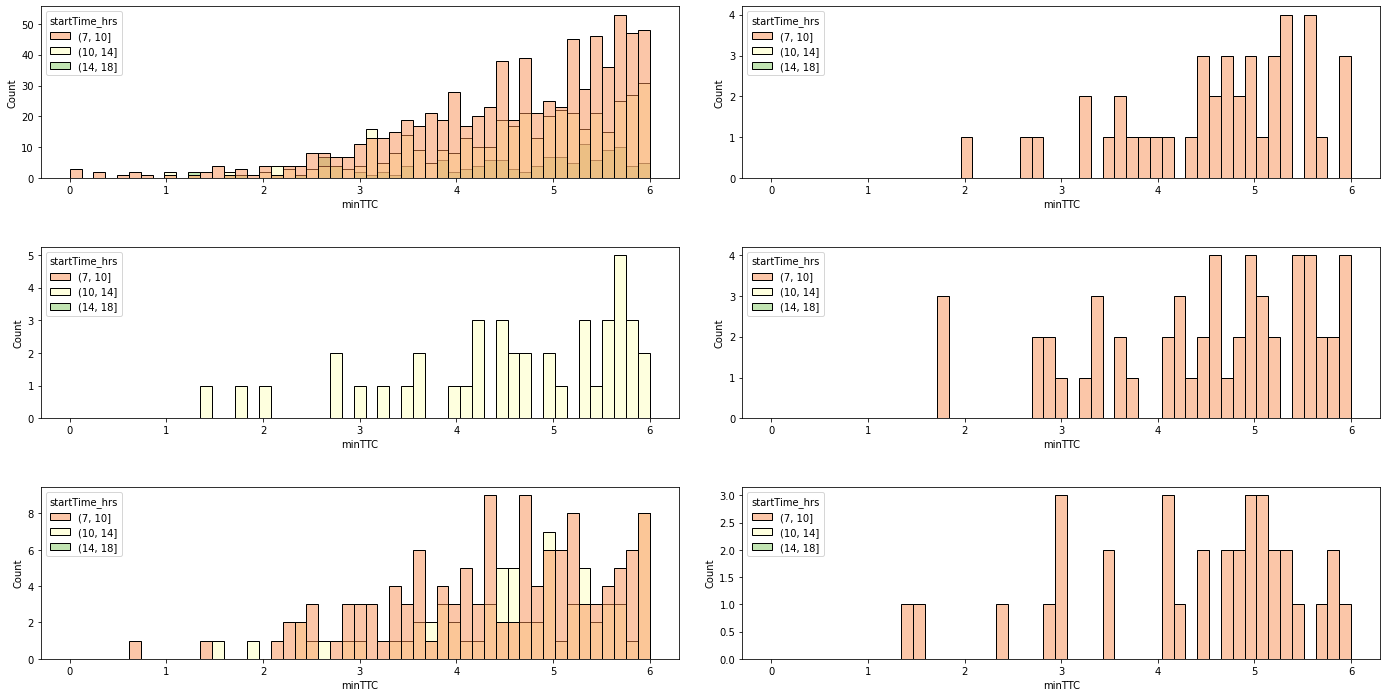

In [48]:
#PLOTTING: TTC
fig = plt.figure(figsize=(24, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(1,7):
    axes = fig.add_subplot(rows, columns, i)
    #GROUPING
    vehTTC = tracksMeta[ tracksMeta.locationId == i ]
    vehTTC['startTime_hrs'] = vehTTC['startTime'].apply\
        (lambda x: re.sub(":[0-9].$", '', x)).astype('float')
    vehTTC.reset_index(inplace=True)
    splitHours = pd.cut(vehTTC["startTime_hrs"], bins=[7, 10, 14, 18])
    
    #filtering out vehicles that do not change lanes or have TTC greater than 6 sec
    i = vehTTC[ (vehTTC.minTTC > 0) & (vehTTC.minTTC < 6) & (vehTTC.numLaneChanges != 0)].index
    vehTTC = vehTTC.drop(i)
    
    sns.histplot(x=vehTTC['minTTC'], bins = np.linspace(0, 6, 50),
             palette="RdYlGn", hue=splitHours)

For TTC, we consider only the cases where maneuvers were performed, assuming such maneuvers to be
solely comprised of lane changes, which would involve accelerating and braking to get to the new position 
by the user. 

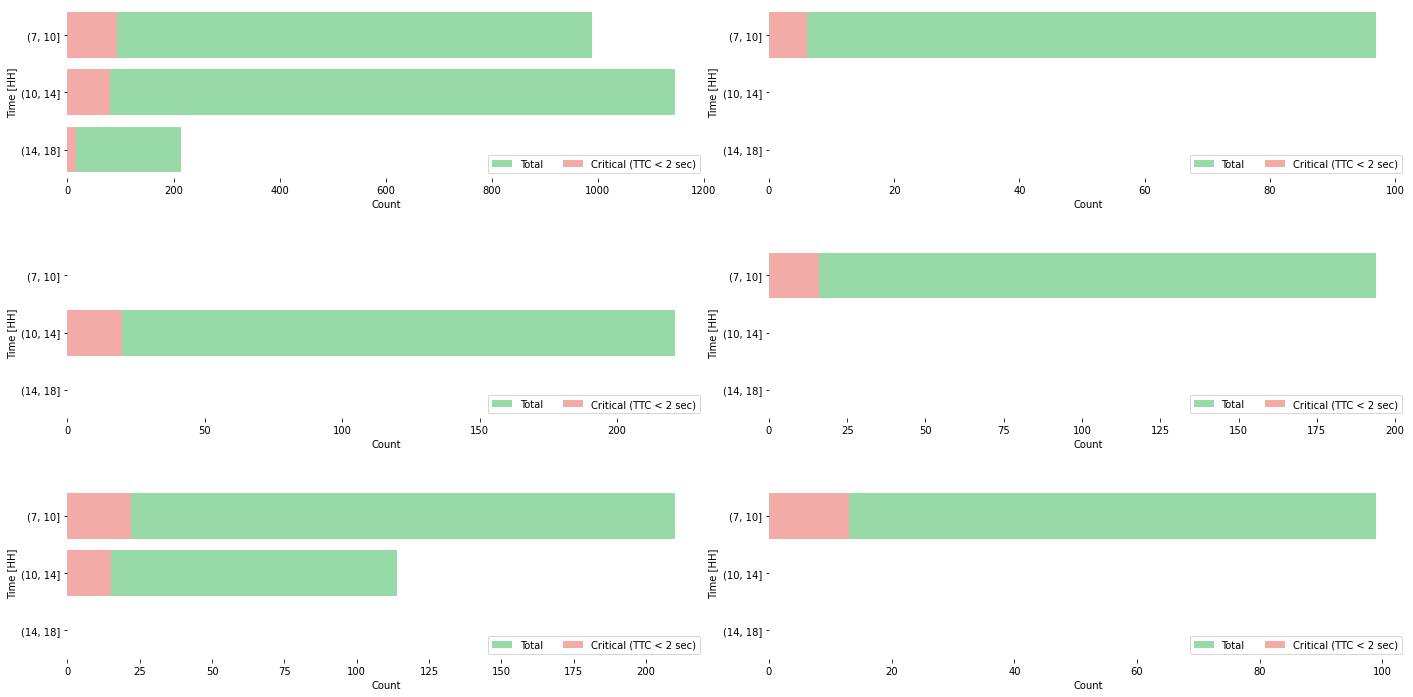

In [49]:
#PLOTTING: TTC critical compare to total
fig = plt.figure(figsize=(24, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(1,7):
    axes = fig.add_subplot(rows, columns, i)
    #GROUPING
    vehTTC_crit = tracksMeta[ (tracksMeta.locationId == i) 
                              & (tracksMeta.minTTC < 6) & (tracksMeta.minTTC > 0) & (tracksMeta.numLaneChanges != 0)]
    vehTTC_crit['startTime_hrs'] = vehTTC_crit['startTime'].apply\
    (lambda x: re.sub(":[0-9].$", '', x)).astype('float')
    
    vehTTC_crit_tot = vehTTC_crit.groupby( pd.cut(vehTTC_crit["startTime_hrs"], bins=[7, 10, 14, 18]) )['minTTC'].count()
    
    vehTTC_crit_per = vehTTC_crit[ (vehTTC_crit.locationId == i) 
                                   & (vehTTC_crit.minTTC < 2) & (vehTTC_crit.minTTC > 0) & (vehTTC_crit.numLaneChanges != 0)]
    vehTTC_crit_per = vehTTC_crit_per.groupby( pd.cut(vehTTC_crit_per["startTime_hrs"], bins=[7, 10, 14, 18]) )['minTTC'].count()
    sns.set_color_codes("pastel")
    sns.barplot(y=vehTTC_crit_tot.index, x=vehTTC_crit_tot.values, label="Total", color="g")
    sns.barplot(y=vehTTC_crit_per.index, x=vehTTC_crit_per.values, label="Critical (TTC < 2 sec)", color="r")
    # Add a legend and informative axis label
    axes.legend(ncol=2, loc="lower right", frameon=True)
    axes.set(ylabel="Time [HH]", xlabel="Count")
    sns.despine(left=True, bottom=True)

Again, several vehicles actually were at risk of succumbing to accidents. But it is not unexpected 
because of Germany having no speed-limits on highways.   

It is recommended that authorities use THW as criterion for tailgating, because
it is directed against potential danger, which effectively prevents dangerous TTC
values from occurring at all. TTC values should be used if the actual
safety of a situation has to be evaluated. A particular
road design or driver can be evaluated with respect to safety
by examining the actual percentage of dangerously small
TTC values within a given time frame [4]. 

## Use in simulation for functional development
As previously seen, the dataset consists of fields such as position, velocity and
longitudinal and lateral acceleration which are fairly accurate to aid simulation
studies. Many commercial vehicle simulation environments exist, a popular one being
IPG CarMaker. 

![highD](images/carmaker2.JPG "IPG CarMaker")

Usually the simulation scenarios are created based on user-knowledge, but a more realistic
simulation is possible with the recorded dynamic fields from the dataset, that can be 
directly used in the environment of CarMaker. CarMaker includes highly detailed dynamical models of vehicles. Virtual simulation 
environments can be created to develop and test various features like that relating to ADAS. As scuh, 
making such a simulation as realistic as possible is highly desirable. The dataset can be used to provide 
naturalistic trajectories to be simulated by the model under consideration.

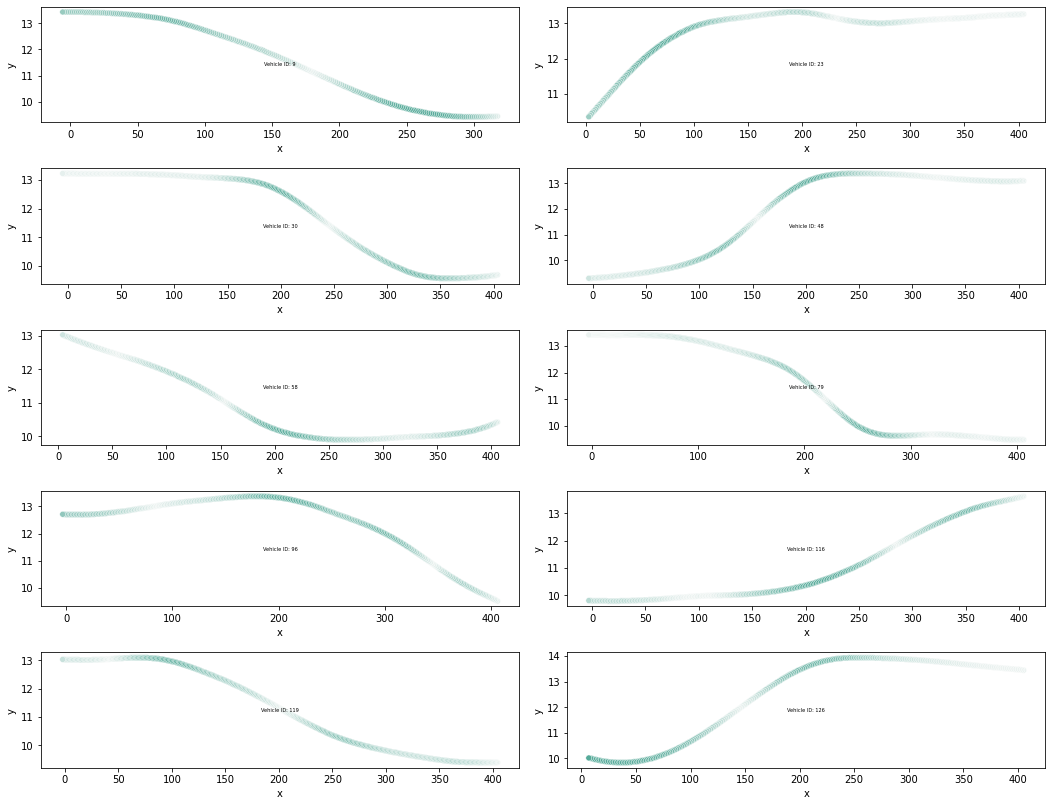

In [111]:
vehicleID_ChangeLane = tracksMeta01[ (tracksMeta01['numLaneChanges'] == 1) & (tracksMeta01['drivingDirection'] == 1) ].index.values

columns = 2
rows = 5
fig = plt.figure(figsize=(18, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
for i, j in zip( vehicleID_ChangeLane[0:10], range(1, 11) ):
    axes = fig.add_subplot(rows, columns, j)
    axes.text(0.5, 0.5, 'Vehicle ID: ' + str(i),
              fontsize=5, horizontalalignment='center',
       verticalalignment='center', transform=axes.transAxes)
    x_pos = tracks01[ (tracks01['id']) == i ].x
    y_pos = tracks01[ (tracks01['id']) == i ].y
    acc = tracks01[ (tracks01['id']) == i ].yAcceleration.abs()
    sns.scatterplot(x_pos, y_pos, hue=acc, palette="light:#5A9", legend=False)


## Conclusion
It has been shown that the highD dataset, apart from its intended function in safety validation for autonomous vehicles
finds good usage in other situations such as traffic analysis and virtual feature development. Another area of study
that the dataset is ready-to-use is energy and emission calculations of the vehicles on highway and will be considered 
in the future.


## References
[1] A. Geiger, P. Lenz, C. Stiller, and R. Urtasun, “Vision meets robotics:
The KITTI dataset” - The International Journal of Robotics Research,
vol. 32, no. 11, pp. 1231–1237, 2013

[2] M. Cordts et al., “The Cityscapes Dataset for Semantic Urban Scene
Understanding” - 29th IEEE Conference on Computer Vision and
Pattern Recognition (CVPR), Las Vegas, 2016, pp. 3213–3223

[3] Krajewski, Robert and Bock, Julian and Kloeker, Laurent and Eckstein, Lutz, "The highD Dataset: 
A Drone Dataset of Naturalistic Vehicle Trajectories on German Highways for Validation of Highly 
Automated Driving Systems" - 2018 21st International Conference on Intelligent Transportation 
Systems (ITSC), pp. 2118-2125

[4] K. Vogel, "A comparison of headway and time to collision as safety indicators" - Swedish National 
Road and Transport Research Institute, S-581 95 Linköping, Sweden